### **Business Goal:**
With the available independent variables, we must model the demand for shared bikes. The management will use it to determine precisely how the needs change with changing features. They can adjust their business approach in accordance with demand levels and client expectations. The model will also help management better grasp the dynamics of demand in a new market. 

In [419]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.metrics import mean_squared_error,  mean_absolute_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model

In [420]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)

    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

def boxplot(df, col_sel):
  plt.figure(figsize=(20,50))#20,50
  for index in range(0,len(col_sel)):
      plt.subplot(len(col_sel )+ 1,len(col_sel ),index+1)
      sns.set_style('whitegrid')
      sns.boxplot(y=df[col_sel[index]],data= df,color='blue')
      plt.tight_layout()

In [421]:
url= "https://drive.google.com/file/d/1QWbvorfLkLI0PXkrWd_q5YvNMJeRYK7l/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [422]:
# df_days =pd.read_csv('/content/drive/MyDrive/DAE Project/day.csv')
# df_days.tail()

In [423]:
# df_merged = pd.merge(df, df_days, on='yr') 

In [424]:
# df_merged

In [425]:
# df_merged['yr'].unique()

### **0. Information**

In [426]:
# print(df_merged.shape)
print(df.shape)

(17379, 17)


* we have $17379$ instances and $17$ features

In [427]:
display(df.describe())
# display(df_days.describe())

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


* above is a statestical description of the features in consideration

In [428]:
display(df.info())
# print()
# print('For the days dataset we have')
# display(df_days.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


None

* discritive information about the dataset
* above shows that we have datatypes of object,integer and floats only 

In [429]:
df["dteday"] = pd.to_datetime(df['dteday'])

In [430]:
# list of all the featurs in the dataset
cols = []
for i, feature in enumerate(df.columns):
    cols.append(feature)
    print(i+1 , feature)

1 instant
2 dteday
3 season
4 yr
5 mnth
6 hr
7 holiday
8 weekday
9 workingday
10 weathersit
11 temp
12 atemp
13 hum
14 windspeed
15 casual
16 registered
17 cnt


* above is a list of all the features we are considering in this dataset
* it can be noted that the naming convention is not precise thus we will need to fix them later

### **1. Preprossesing**

##### **NULL/MISSING values**

In [431]:
display(df.isnull().sum())
# print()
# print()
# display(df_days.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

* There are no missing values in the dataset

#### **Duplicate values**

In [432]:
print("before dropping duplicates", df.shape)
df.drop_duplicates()
print("After dropping duplicates " , df.shape ) 

before dropping duplicates (17379, 17)
After dropping duplicates  (17379, 17)


* there are no duplicates in the dataset

#### **Column Renaming** 

In [433]:
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


* above is current naming conventions but some are in abbreviations thus we need to rename them

In [434]:
df.rename({'dteday': "date",
           'yr': 'year',
           'mnth' : 'month',
           'hr' : 'hour',
           'weathersit': 'weather',
           'temp': 'temperature',
           'atemp': 'a_temparature',
           'hum': 'humidity',
           'cnt': 'count'}, axis=1, inplace=True) 
df.columns

Index(['instant', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temperature', 'a_temparature',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### **2. Cleaning**

#### **Feature Engineering**

* the first thing to notice is that we have features which are not needed
* `'instant'` is just an index which we can drop
* `'date'` has already been decoposed into month, year all thats left is to compose it into day of the month


In [435]:
df['day'] = pd.to_datetime(df['date']).dt.day
df = df[['date', 'hour', 'day',  'month', 'season', 'year', 'holiday',
       'weekday', 'workingday', 'weather', 'temperature', 'a_temparature', 'humidity',
       'windspeed', 'casual', 'registered', 'count']]
df.head()

,date,hour,day,month,season,year,holiday,weekday,workingday,weather,temperature,a_temparature,humidity,windspeed,casual,registered,count
0,2011-01-01,0,1,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,1,1,1,0,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,2,1,1,1,0,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,3,1,1,1,0,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,4,1,1,1,0,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### **Outliers**

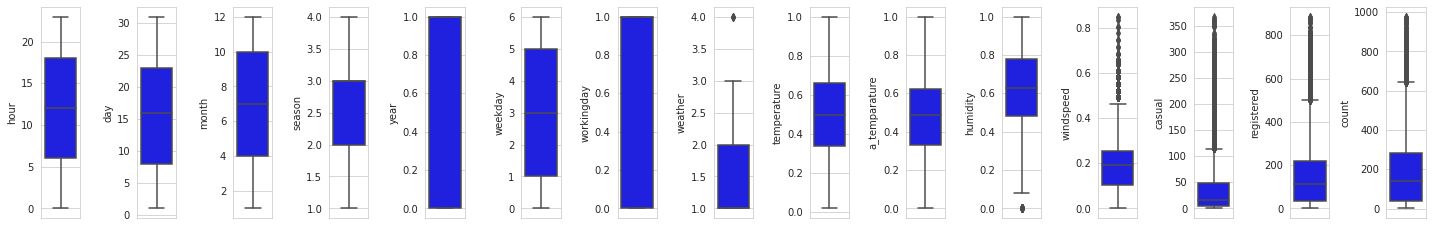

In [436]:
col_sel1= ['hour', 'day',  'month', 'season', 'year', 'weekday', 'workingday', 'weather', 'temperature', 'a_temparature', 'humidity',
       'windspeed', 'casual', 'registered', 'count']

boxplot(df, col_sel1)

* the box plots shows that `weather`,`weedspeed`, `casual`, `registered` and `count` have outliers
* They are not too big thus we will decide to leave them. they might have valuable information 

### **3. Data Analysis and Exploration**

#### **Correlation of the features**

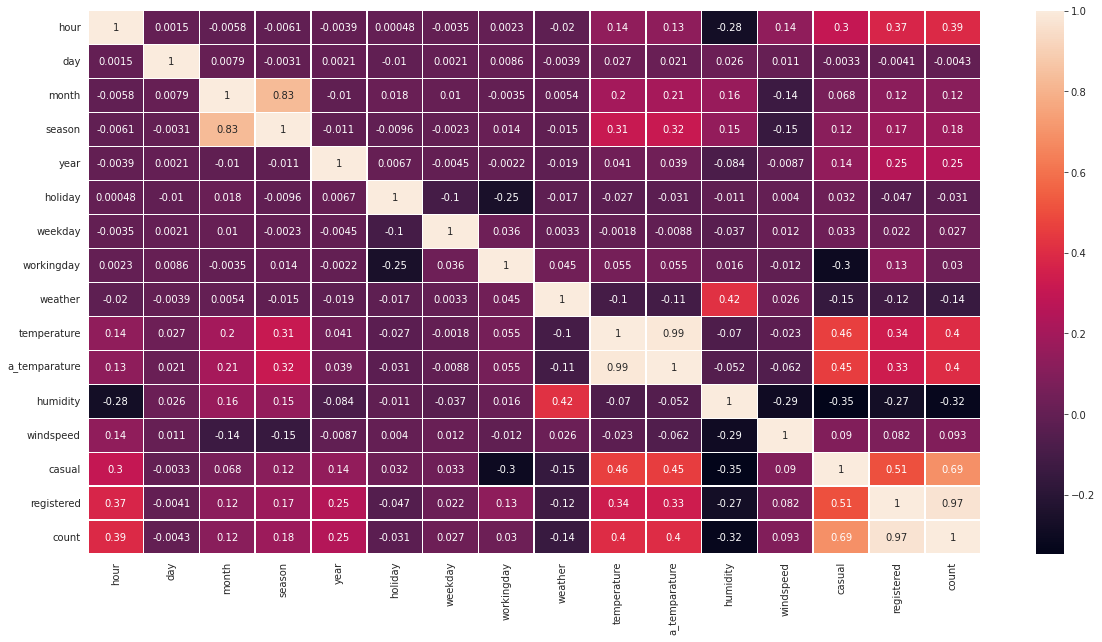

In [437]:
d = df[['hour', 'day', 'month', 'season', 'year', 'holiday', 'weekday',
       'workingday', 'weather', 'temperature','a_temparature', 'humidity', 'windspeed',
       'casual', 'registered', 'count']]

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(d.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

* count, casual and registered have a strong positive linear relationship
* month and season are also linearly independent this means we dont need the other if we have one.
* weather, humidity show a strong positive linear relationship against count

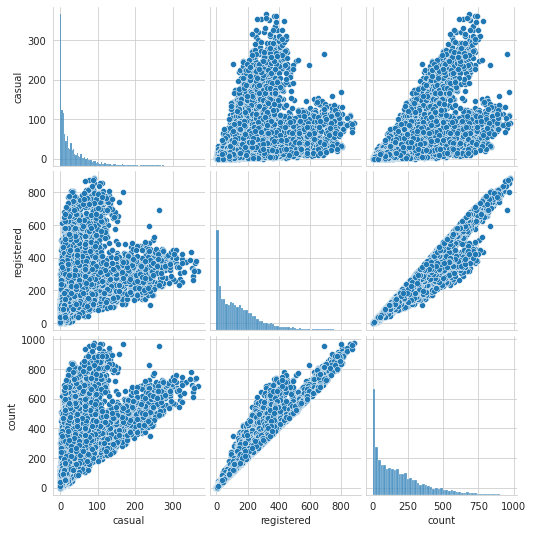

In [438]:
d = df[[
       'casual', 'registered', 'count']]
sns.pairplot(d)
plt.show()

* The relationship between the casual, registered and count features is proportional.
* Registered has a high correlation to count than casual is to count.

#### **Exploratory analysis on Bike Hire**

* first we work with a copy of the data and add categorical data on it for the purpose of analysis and exploration

In [439]:
bike = df.copy()
bike['weekday_name'] = pd.to_datetime(bike['date']).dt.day_name()
bike['month_name'] = pd.to_datetime(bike['date']).dt.month_name()
bike.head()

,date,hour,day,month,season,year,holiday,weekday,workingday,weather,temperature,a_temparature,humidity,windspeed,casual,registered,count,weekday_name,month_name
0,2011-01-01,0,1,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Saturday,January
1,2011-01-01,1,1,1,1,0,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Saturday,January
2,2011-01-01,2,1,1,1,0,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Saturday,January
3,2011-01-01,3,1,1,1,0,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Saturday,January
4,2011-01-01,4,1,1,1,0,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Saturday,January


Year (0: 2011,   1:2012)


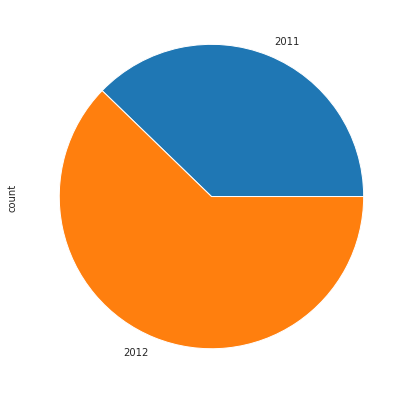

In [440]:
bike.groupby(['year'])['count'].sum().plot.pie(figsize=(7,7), labels=["2011","2012"])
print('Year (0: 2011,   1:2012)')

* We only have 2 years of data 2011 and 2012
* it is also shown that 2012 there was high rise of bike rental compared to 2011
* the petten show that there is popularity inbike rental as years progresses

working day 11865 
not work day 5514


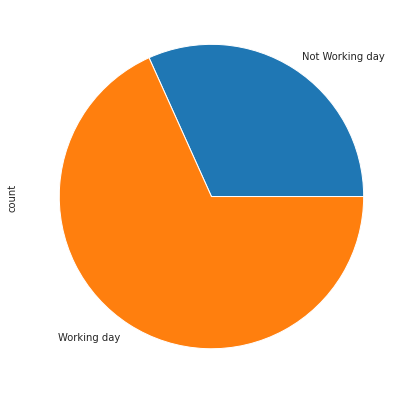

holiday 500 
not a holiday 16879


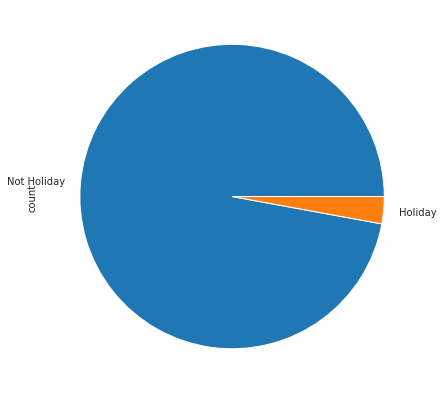

In [441]:
workingday  = bike.groupby(['workingday'])['count'].count() 
print('working day', workingday[1], '\nnot work day', workingday[0])
workingday.plot.pie(figsize=(7,7), labels=["Not Working day","Working day"])
plt.show()

workingday  = bike.groupby(['holiday'])['count'].count() 
print('holiday', workingday[1], '\nnot a holiday', workingday[0])
workingday.plot.pie(figsize=(7,7), labels=["Not Holiday","Holiday"])
plt.show()

* Bikes are most hired if day is neither weekend nor holiday is

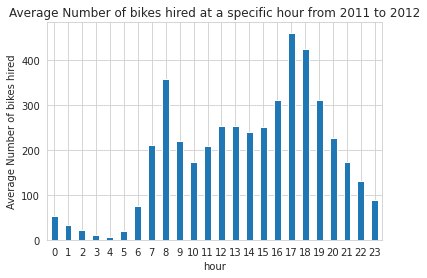

In [442]:
weekday_name  = bike.groupby(['hour'])['count'].mean() 
weekday_name.plot.bar(rot=0)

plt.ylabel("Average Number of bikes hired")
plt.title("Average Number of bikes hired at a specific hour from 2011 to 2012")
plt.show()

* there are a lot of hires in the evening between 16-19 
* there is an abnormal spike of bike hiring around 8 which could be because people are going to work and this is the most earliest time where there is a lot of commotion.

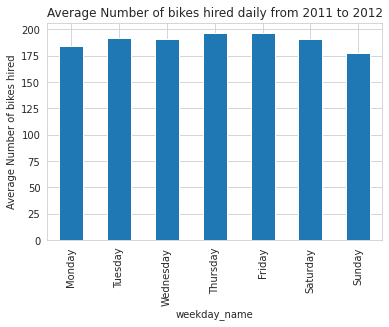

In [443]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_name  = bike.groupby(['weekday_name'])['count'].mean().reindex(days) 
weekday_name.plot.bar()

plt.ylabel("Average Number of bikes hired")
plt.title("Average Number of bikes hired daily from 2011 to 2012")
plt.show()

* From Sunday to Mondays bike hires are increasing and drop on weekend

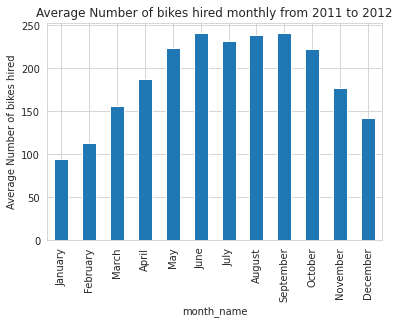

In [444]:
months = list(bike['month_name'].unique())
month_name  = bike.groupby(['month_name'])['count'].mean().reindex(months) 
month_name.plot.bar()
plt.ylabel("Average Number of bikes hired")
plt.title("Average Number of bikes hired monthly from 2011 to 2012")
plt.show()

* Months show more difference in bike hire than week and there is a trend showing that bike hire increases from January-September then decreases from October-December
* The highest hire being around August, June, September
* The lowest being at January

#### Seasons to months in London
* Spring: March to May.
* Summer: June to August.
* Autumn: September to November.
* Winter: December to February.

In [445]:
bike.loc[bike['month_name'] == 'December', 'season'] = 4
bike.loc[bike['month_name'] == 'January', 'season'] = 4
bike.loc[bike['month_name'] == 'February', 'season'] = 4

bike.loc[bike['month_name'] == 'March', 'season'] = 1
bike.loc[bike['month_name'] == 'April', 'season'] = 1
bike.loc[bike['month_name'] == 'May', 'season'] = 1

bike.loc[bike['month_name'] == 'June', 'season'] = 2
bike.loc[bike['month_name'] == 'July', 'season'] = 2
bike.loc[bike['month_name'] == 'August', 'season'] = 2

bike.loc[bike['month_name'] == 'September', 'season'] = 3
bike.loc[bike['month_name'] == 'October', 'season'] = 3
bike.loc[bike['month_name'] == 'November', 'season'] = 3

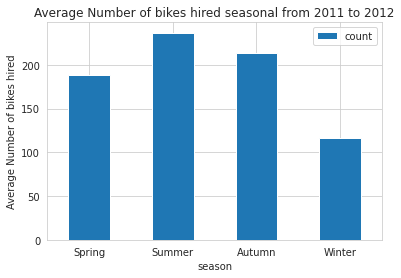

In [446]:
season  = bike.groupby(['season'])['count'].mean() 


season_df = pd.DataFrame(season).reset_index()

season_df.replace(1,"Spring", inplace=True)
season_df.replace(2,"Summer", inplace=True)
season_df.replace(3,"Autumn", inplace=True)
season_df.replace(4,"Winter", inplace=True)
season_df.set_index("season",inplace=True)
season_df.plot.bar(rot=0)

plt.ylabel("Average Number of bikes hired")
plt.title("Average Number of bikes hired seasonal from 2011 to 2012")
plt.show()

* As the months show more significance difference on bike hire than days of the week, seasons have more symmetry than month and days of the week
* the Summer season is shown to have more bike hire than the other seasons. This is due to the fact that summers generally have  mild and pleasant, and not without occasional rain showers in London. \[[london perfect](https://www.londonperfect.com/plan-your-trip/practical-information/weather-seasons.php)\]
* Winters are cold and often rainy weather making the environment have temperatures not ideal for bike rides.

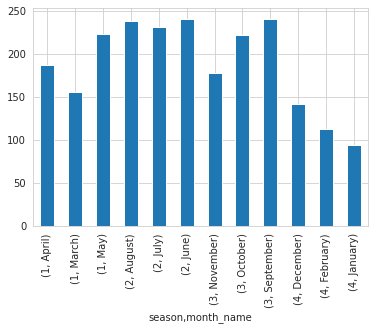

Season (1: spring, 2: summer, 3: autumn, 4: winter)


In [447]:
seasons =[1, 2, 3, 4]
season  = bike.groupby(['season', 'month_name'])['count'].mean().sort_index(level =0)
season.plot.bar()
plt.show()
print('Season (1: spring, 2: summer, 3: autumn, 4: winter)')

* Looking at months within seasons, summer and autumn have the most active month during the course of the year
* summer has the most hires in June and lowest in July
* winter has the most hires in December and lowest in January
* spring has the most hires in May and lowest in March
* autumn has the most hires in September and lowest in November

* overall showing that winter is not good for buisiness as alluded in the previous plot.

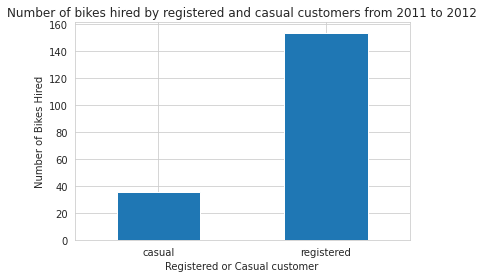

In [448]:
bike[['casual', 'registered']].mean().plot.bar(rot=0)
plt.ylabel("Number of Bikes Hired")
plt.xlabel("Registered or Casual customer")
plt.title("Number of bikes hired by registered and casual customers from 2011 to 2012")
plt.show()

* There are more registered customers than just casual customers

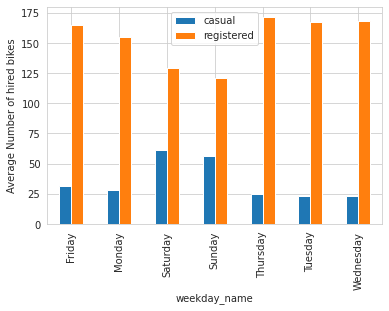

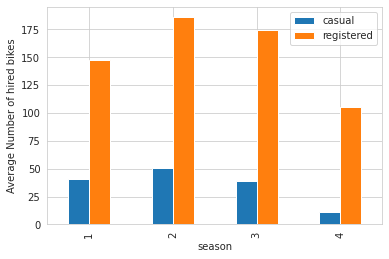

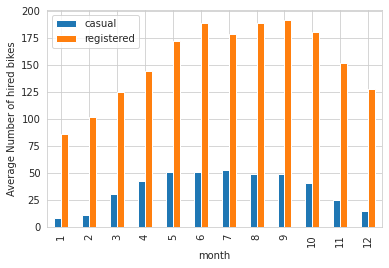

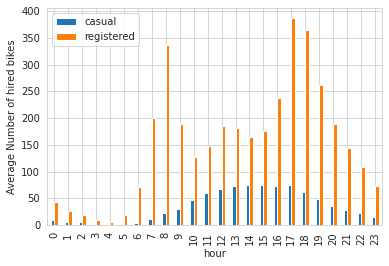

In [449]:
bike.groupby(['weekday_name'])[['casual', 'registered']].mean().plot.bar()
plt.ylabel("Average Number of hired bikes")
bike.groupby(['season'])[['casual', 'registered']].mean().plot.bar()
plt.ylabel("Average Number of hired bikes")
bike.groupby(['month'])[['casual', 'registered']].mean().plot.bar()
plt.ylabel("Average Number of hired bikes")
bike.groupby(['hour'])[['casual', 'registered']].mean().plot.bar()
plt.ylabel("Average Number of hired bikes")
plt.show()

* the visuals above shows that regardless of the hour, day, month or season there are more registered customers than there are casual customers respectively.

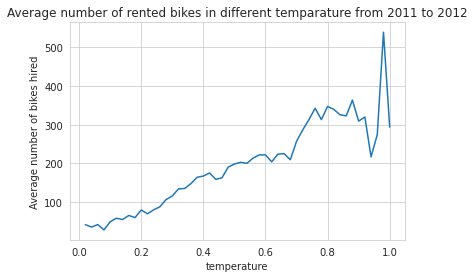

In [450]:
bike.groupby(['temperature'])['count'].mean().plot()
plt.ylabel("Average number of bikes hired")
plt.title("Average number of rented bikes in different temparature from 2011 to 2012")
plt.show()

* on avarage, the highter temperature the more people take rides

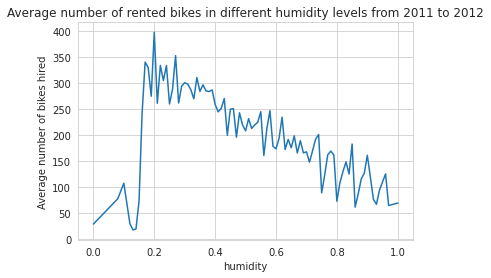

In [451]:
bike.groupby(['humidity'])['count'].mean().plot()
plt.ylabel("Average number of bikes hired")
plt.title("Average number of rented bikes in different humidity levels from 2011 to 2012")

plt.show()

* on avarage, the humid the air the less people take rides
* This make sense because humidity is inversly propotional to temperature thus if one gives more bike hires then the other will give less. 

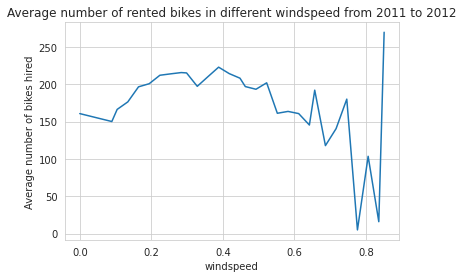

In [452]:
bike.groupby(['windspeed'])['count'].mean().plot()
plt.ylabel("Average number of bikes hired")
plt.title("Average number of rented bikes in different windspeed from 2011 to 2012")

plt.show()

* There is no well defined relationship between wind speed and the backs are hired

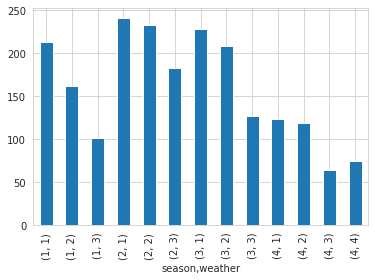

Weather Situation 
1: Clear, Few   clouds, Partly cloudy, Partly cloudy; 
2: Mist + Cloudy, Mist + Broken clouds,   Mist + Few clouds, Mist; 
3: Light Snow, Light Rain + Thunderstorm + Scattered   clouds, Light Rain + Scattered clouds, 
4: Heavy Rain + Ice Pallets +   Thunderstorm + Mist, Snow + Fog)


In [453]:
bike.groupby(['season','weather'])['count'].mean().plot.bar(rot=90)
plt.show()
print('Weather Situation \n1: Clear, Few   clouds, Partly cloudy, Partly cloudy; \n2: Mist + Cloudy, Mist + Broken clouds,   Mist + Few clouds, Mist; \n3: Light Snow, Light Rain + Thunderstorm + Scattered   clouds, Light Rain + Scattered clouds, \n4: Heavy Rain + Ice Pallets +   Thunderstorm + Mist, Snow + Fog)')

* In Spring the weather that occurs often is number 1 and as expected in this season harsh weather conditions \[4\] seldom occur which is also shown in Summer and Autumn and this results to the number of bike hires on average to remain high.
* Winter has harsh weather condtions as depicted by the low number of bike hires on average.

### **4. Modelling**

### **4.1 Linear Regression**

#### **Training and Testing Data**

In [454]:
#Setting the date and time to be indexes of the data
df_temp = df.copy()
df_temp["hour"] = pd.to_datetime(df['hour'], format='%H')

df_temp["hour"]=df_temp["hour"].dt.time

df_temp["date_time"] = df_temp["date"].astype(str) + " " + df_temp["hour"].astype(str)

# df_temp["hour"] = pd.to_datetime(df['hour'], format='%H')
df_temp["date_time"]=pd.to_datetime(df_temp['date_time'])
df_temp.set_index("date_time",inplace=True)
df_temp.drop(columns=["date","day","month","hour"], inplace=True)
df_temp

,season,year,holiday,weekday,workingday,weather,temperature,a_temparature,humidity,windspeed,casual,registered,count
date_time,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,1,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2012-12-31 20:00:00,1,1,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2012-12-31 21:00:00,1,1,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


Splitting the data into x values, which are to be used as the features, and the y values,which are to be used as the target. 
* We choose to ignore the casual and registered columns as they are both summed up in the count column

In [455]:
x = df_temp[["season","holiday","weekday","workingday","weather","temperature","a_temparature","humidity","windspeed"]]
y =df_temp[["count"]]
display(x)
display(y)

,season,holiday,weekday,workingday,weather,temperature,a_temparature,humidity,windspeed
date_time,,,,,,,,,
2011-01-01 00:00:00,1,0,6,0,1,0.24,0.2879,0.81,0.0000
2011-01-01 01:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0000
2011-01-01 02:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0000
2011-01-01 03:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0000
2011-01-01 04:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0000
...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,1,2,0.26,0.2576,0.60,0.1642
2012-12-31 20:00:00,1,0,1,1,2,0.26,0.2576,0.60,0.1642
2012-12-31 21:00:00,1,0,1,1,1,0.26,0.2576,0.60,0.1642


,count
date_time,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1
...,...
2012-12-31 19:00:00,119
2012-12-31 20:00:00,89
2012-12-31 21:00:00,90


* Use model_selection.TimeSeriesSplit from sklearn to split the data into training and testing sets as this data is of Time Series Thus we can randomise datapoints

In [456]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

tscv = TimeSeriesSplit(2)
test_indexes = []
train_indexes = []


for train_index, test_index in tscv.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    test_indexes = test_index
    train_indexes = train_index

test_df = df_temp.iloc[test_indexes][["season","holiday","weekday","workingday","weather","temperature","a_temparature","humidity","windspeed","count"]]
train_df = df_temp.iloc[train_indexes][["season","holiday","weekday","workingday","weather","temperature","a_temparature","humidity","windspeed","count"]]


X_train = train_df.drop(columns=["count"])
X_test= test_df.drop(columns=["count"])
y_train= train_df[["count"]]
y_test=test_df[["count"]]

#### **Training the Model**

In [457]:
train_df

,season,holiday,weekday,workingday,weather,temperature,a_temparature,humidity,windspeed,count
date_time,,,,,,,,,,
2011-01-01 00:00:00,1,0,6,0,1,0.24,0.2879,0.81,0.0000,16
2011-01-01 01:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2011-01-01 02:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0000,32
2011-01-01 03:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0000,13
2011-01-01 04:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
2012-05-02 18:00:00,2,0,3,1,1,0.56,0.5303,0.73,0.2239,813
2012-05-02 19:00:00,2,0,3,1,1,0.54,0.5152,0.77,0.2537,504
2012-05-02 20:00:00,2,0,3,1,1,0.52,0.5000,0.77,0.2537,338


In [458]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Initial Modelling

* Creating an instance of the Linear Regression model

In [459]:
linear = LinearRegression()

* Fitting the model to the training data

In [460]:
linear.fit(X_train,y_train)

LinearRegression()

* Printing Coefficients of the model

In [461]:
print('Model Coefficients: \n', linear.coef_)

Model Coefficients: 
 [[   3.7051332   -20.13136649    0.6403533     0.65732711    2.41072494
  -125.02136383  465.66382337 -220.01970362   47.83491912]]


### **4.1 Linear Regression**

* Model Prediction on the test data

In [462]:
predicted = linear.predict(X_test)

In [463]:
y_test["predicted"]=predicted
display(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,count,predicted
date_time,,
2012-05-02 23:00:00,98,140.777745
2012-05-03 00:00:00,90,124.460536
2012-05-03 01:00:00,24,100.970201
2012-05-03 02:00:00,17,102.395682
2012-05-03 03:00:00,6,95.971452
...,...,...
2012-12-31 19:00:00,119,93.120336
2012-12-31 20:00:00,89,93.120336
2012-12-31 21:00:00,90,90.709611


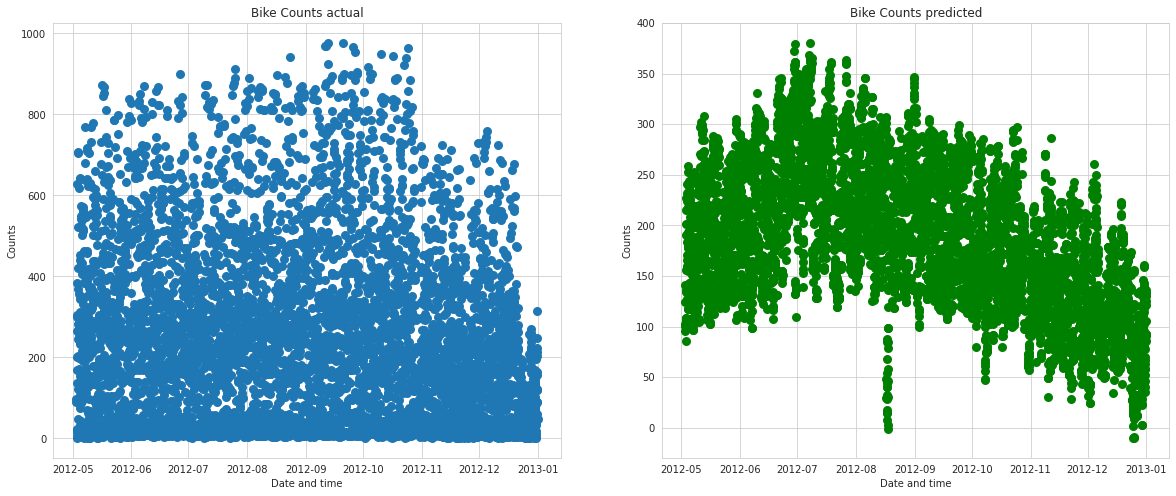

In [464]:
fig, (actual,predicted) = plt.subplots(ncols=2,nrows=1, figsize=(20,8))
# actual.scatter(x=y_test.index,y=y_test[["count"]], linewidth=3)
actual.scatter(x=y_test.index, y=y_test[["count"]], linewidth=3)
actual.set_title("Bike Counts actual")
actual.set_xlabel("Date and time")
actual.set_ylabel("Counts")
# actual.legend(["Actual Counts","Predicted Counts"])


predicted.scatter(x=y_test.index, y=y_test.predicted, linewidth=3, color="green")
predicted.set_title("Bike Counts predicted")
predicted.set_xlabel("Date and time")
predicted.set_ylabel("Counts")
plt.show()


* Accuracy of the Model

In [465]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test[["count"]], y_test[["predicted"]]))
print('MSE:', metrics.mean_squared_error(y_test[["count"]], y_test[["predicted"]]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test[["count"]], y_test[["predicted"]])))
print("R2 score =", round(metrics.r2_score(y_test[["count"]], y_test[["predicted"]]), 2))

MAE: 150.43087216650937
MSE: 43357.85789194681
RMSE: 208.22549769888127
R2 score = 0.1


### **4.2 Linear Regression with Random Forest**

* Used to identify the most important features to train our model on

* Initialize Random Forest Regressor model with 10 decision trees

In [466]:
model = RandomForestRegressor(n_estimators = 10, random_state = 0)

model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=10, random_state=0)

* Predicting the target values on the test set

In [467]:
importances = model.feature_importances_
Cols = np.array(["season","holiday","weekday","workingday","weather","temperature","a_temparature","humidity","windspeed"])
print(len(Cols), len(importances))
feature_importance = pd.DataFrame({'Feature':Cols, 'Importance':importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance=feature_importance.reset_index().drop(columns=["index"])
feature_importance

9 9


,Feature,Importance
0,humidity,0.270622
1,windspeed,0.170927
2,a_temparature,0.163389
3,temperature,0.155224
4,weekday,0.106836
5,season,0.066350
6,weather,0.040481
7,workingday,0.021704
8,holiday,0.004467


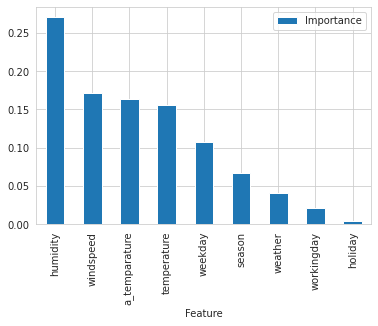

Temperature, weekday, a_temparature, humidity,windspeed are our top 5 most important fetures


In [468]:
feature_importance.plot.bar(x = "Feature",y="Importance")
plt.show()
#
print("Temperature, weekday, a_temparature, humidity,windspeed are our top 5 most important fetures")

* With the aim of improving our model performance we plan to use the top 5 features with the highest importances to trauin our model

In [469]:
train_x_2 = train_df[["season","weekday","temperature","a_temparature","humidity","windspeed"]]
test_x_2 = test_df[["season","weekday","temperature","a_temparature","humidity","windspeed"]]

In [470]:
new_y = train_df[["count"]]

In [471]:
new_lr = LinearRegression()
new_lr.fit(train_x_2,new_y)

LinearRegression()

* Printing the coefficients of the model

In [472]:
print('Coefficients: \n', new_lr.coef_)

Coefficients: 
 [[   3.56624931    0.85080359 -133.59626153  475.63245151 -215.60884084
    49.76747723]]


* Model Prediction on the test data

In [473]:
newpredictions = new_lr.predict(test_x_2)
y_test["predicted_RF"]=newpredictions
display(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,count,predicted,predicted_RF
date_time,,,
2012-05-02 23:00:00,98,140.777745,139.467349
2012-05-03 00:00:00,90,124.460536,123.544515
2012-05-03 01:00:00,24,100.970201,100.108060
2012-05-03 02:00:00,17,102.395682,101.591130
2012-05-03 03:00:00,6,95.971452,94.907358
...,...,...,...
2012-12-31 19:00:00,119,93.120336,90.398216
2012-12-31 20:00:00,89,93.120336,90.398216
2012-12-31 21:00:00,90,90.709611,90.398216


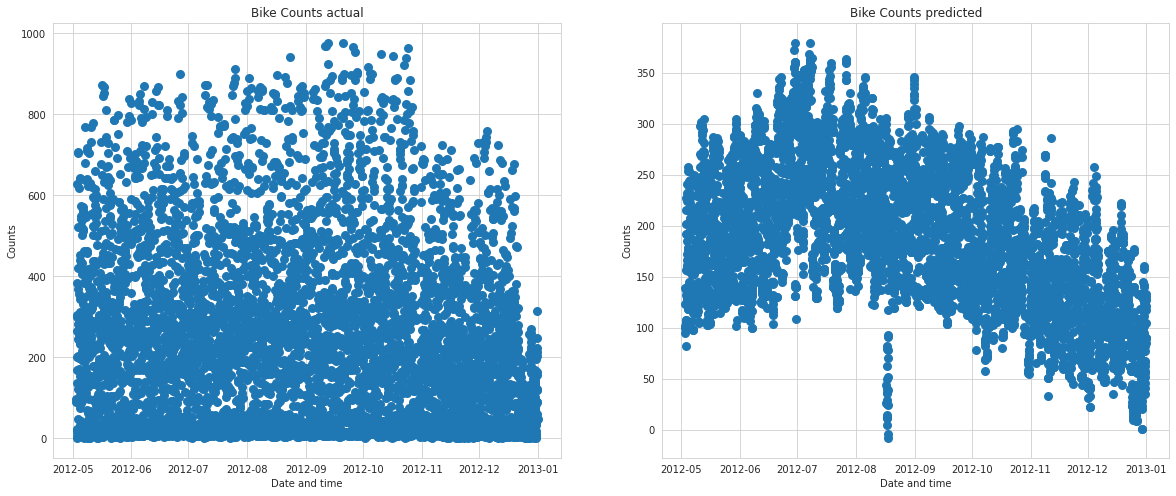

In [474]:
fig, (actual,predicted) = plt.subplots(ncols=2,nrows=1, figsize=(20,8))
actual.scatter(x=y_test.index,y=y_test[["count"]], linewidth=3)
actual.set_title("Bike Counts actual")
actual.set_xlabel("Date and time")
actual.set_ylabel("Counts")

predicted.scatter(x=y_test.index, y=y_test.predicted_RF, linewidth=3)
predicted.set_title("Bike Counts predicted")
predicted.set_xlabel("Date and time")
predicted.set_ylabel("Counts")
plt.show()


* Accuracy of the Model

In [475]:

print('MAE:', metrics.mean_absolute_error(y_test[["count"]], y_test[["predicted_RF"]]))
print('MSE:', metrics.mean_squared_error(y_test[["count"]], y_test[["predicted_RF"]]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test[["count"]], y_test[["predicted_RF"]])))
print("R2 score =", round(metrics.r2_score(y_test[["count"]], y_test[["predicted_RF"]]), 2))

MAE: 150.66872903578792
MSE: 43433.868605150965
RMSE: 208.40793796098785
R2 score = 0.1


### **4.3 Ridge Regression**

* Creating Ridge Regression object with alpha = 0.4

In [476]:
ridge = Ridge(fit_intercept=True, alpha=.4)

* Model Predictions on test data

In [477]:
ridge.fit(X_train, y_train) 

y_ridge_predict = ridge.predict(X_test)
y_test["predicted_RR"]=y_ridge_predict
y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,count,predicted,predicted_RF,predicted_RR
date_time,,,,
2012-05-02 23:00:00,98,140.777745,139.467349,140.451577
2012-05-03 00:00:00,90,124.460536,123.544515,124.114402
2012-05-03 01:00:00,24,100.970201,100.108060,100.832277
2012-05-03 02:00:00,17,102.395682,101.591130,102.184148
2012-05-03 03:00:00,6,95.971452,94.907358,96.091657
...,...,...,...,...
2012-12-31 19:00:00,119,93.120336,90.398216,93.492556
2012-12-31 20:00:00,89,93.120336,90.398216,93.492556
2012-12-31 21:00:00,90,90.709611,90.398216,91.160724


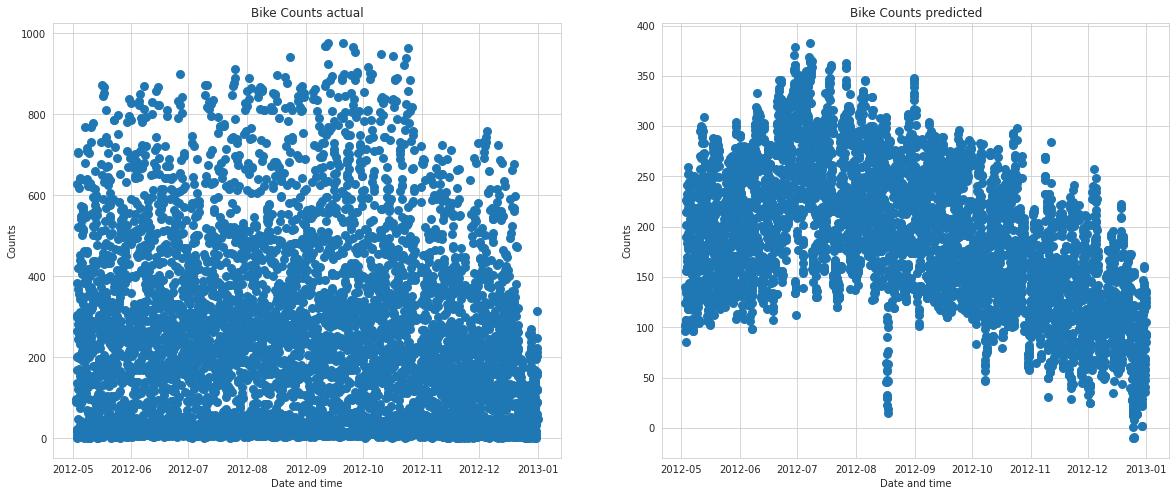

In [478]:
fig, (actual,predicted) = plt.subplots(ncols=2,nrows=1, figsize=(20,8))
actual.scatter(x=y_test.index,y=y_test[["count"]], linewidth=3)
actual.set_title("Bike Counts actual")
actual.set_xlabel("Date and time")
actual.set_ylabel("Counts")

predicted.scatter(x=y_test.index, y=y_test.predicted_RR, linewidth=3)
predicted.set_title("Bike Counts predicted")
predicted.set_xlabel("Date and time")
predicted.set_ylabel("Counts")
plt.show()


* Accuracy of the Model

In [479]:

print('MAE:', metrics.mean_absolute_error(y_test[["count"]], y_test[["predicted_RR"]]))
print('MSE:', metrics.mean_squared_error(y_test[["count"]], y_test[["predicted_RR"]]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test[["count"]], y_test[["predicted_RR"]])))
print("R2 score =", round(metrics.r2_score(y_test[["count"]], y_test[["predicted_RR"]]), 2))

MAE: 150.40050589710043
MSE: 43322.341501839815
RMSE: 208.14019674690377
R2 score = 0.1


### **4.4 Lasso Regression**

* Create Lasso Regression Object with alpha = 0.4

In [480]:
lasso = Lasso(alpha=.4)

* Model Predictions on test data

In [481]:
lasso.fit(X_train, y_train) 

y_lasso_predict = lasso.predict(X_test)
y_test["predicted_Lasso"]=y_lasso_predict
y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,count,predicted,predicted_RF,predicted_RR,predicted_Lasso
date_time,,,,,
2012-05-02 23:00:00,98,140.777745,139.467349,140.451577,137.454425
2012-05-03 00:00:00,90,124.460536,123.544515,124.114402,122.425302
2012-05-03 01:00:00,24,100.970201,100.108060,100.832277,103.046442
2012-05-03 02:00:00,17,102.395682,101.591130,102.184148,103.547048
2012-05-03 03:00:00,6,95.971452,94.907358,96.091657,101.290959
...,...,...,...,...,...
2012-12-31 19:00:00,119,93.120336,90.398216,93.492556,95.668901
2012-12-31 20:00:00,89,93.120336,90.398216,93.492556,95.668901
2012-12-31 21:00:00,90,90.709611,90.398216,91.160724,95.668901


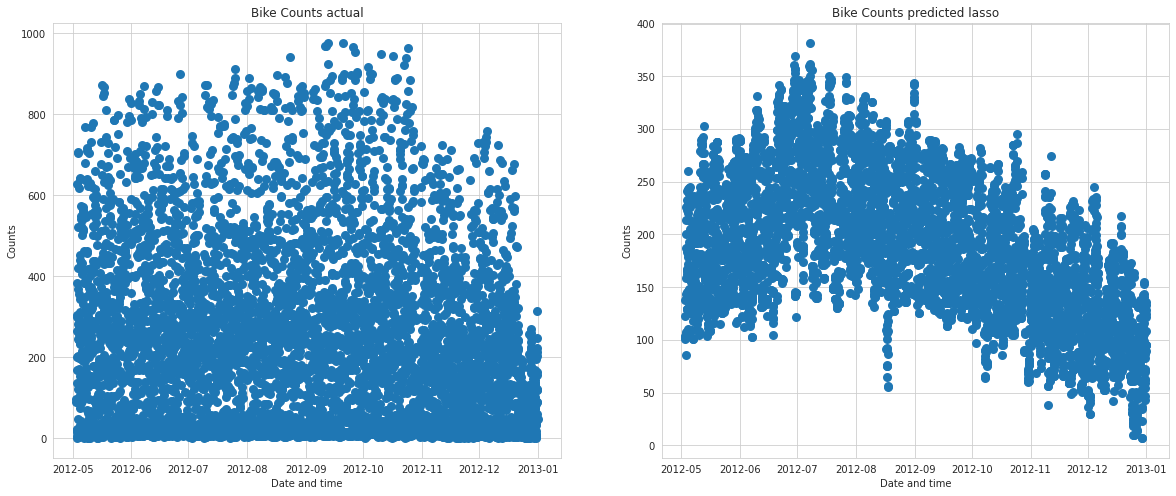

In [482]:
fig, (actual,predicted) = plt.subplots(ncols=2,nrows=1, figsize=(20,8))
actual.scatter(x=y_test.index,y=y_test[["count"]], linewidth=3)
actual.set_title("Bike Counts actual")
actual.set_xlabel("Date and time")
actual.set_ylabel("Counts")

predicted.scatter(x=y_test.index, y=y_test.predicted_Lasso, linewidth=3)
predicted.set_title("Bike Counts predicted lasso")
predicted.set_xlabel("Date and time")
predicted.set_ylabel("Counts")
plt.show()

* Accuracy of the Model

In [483]:

print('MAE:', metrics.mean_absolute_error(y_test[["count"]], y_test[["predicted_Lasso"]]))
print('MSE:', metrics.mean_squared_error(y_test[["count"]], y_test[["predicted_Lasso"]]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test[["count"]], y_test[["predicted_Lasso"]])))
print("R2 score =", round(metrics.r2_score(y_test[["count"]], y_test[["predicted_Lasso"]]), 2))

MAE: 151.26557821286025
MSE: 43677.994678795134
RMSE: 208.99281011268098
R2 score = 0.09


In [484]:
indexes = ["MSE", "RMSE", "MAE", "R2 score"]
Dist_1 = {"Model_1":[43357.85789,208.2254,150.4308,0.1], "Model_2":[43433.86860,208.40793,150.66872, 0.1],"Model_3":[43322.34150,208.140196,150.4005,0.1], "Model_4":[43677.99467,208.992810,151.265578,0.09]
,"indexes":indexes}


s1 = pd.DataFrame(Dist_1)
s1.set_index("indexes", inplace=True)
s1

,Model_1,Model_2,Model_3,Model_4
indexes,,,,
MSE,43357.85789,43433.86860,43322.341500,43677.994670
RMSE,208.22540,208.40793,208.140196,208.992810
MAE,150.43080,150.66872,150.400500,151.265578
R2 score,0.10000,0.10000,0.100000,0.090000


In [485]:
y_test

,count,predicted,predicted_RF,predicted_RR,predicted_Lasso
date_time,,,,,
2012-05-02 23:00:00,98,140.777745,139.467349,140.451577,137.454425
2012-05-03 00:00:00,90,124.460536,123.544515,124.114402,122.425302
2012-05-03 01:00:00,24,100.970201,100.108060,100.832277,103.046442
2012-05-03 02:00:00,17,102.395682,101.591130,102.184148,103.547048
2012-05-03 03:00:00,6,95.971452,94.907358,96.091657,101.290959
...,...,...,...,...,...
2012-12-31 19:00:00,119,93.120336,90.398216,93.492556,95.668901
2012-12-31 20:00:00,89,93.120336,90.398216,93.492556,95.668901
2012-12-31 21:00:00,90,90.709611,90.398216,91.160724,95.668901


In [486]:
from sklearn.ensemble import RandomForestRegressor

#Modelling and Forecasting
model_randomF = RandomForestRegressor(n_estimators=1000)
model_randomF.fit(X_train, y_train)
predicted_randomF = model_randomF.predict(X_test)
y_test["predicted_RF_regressor"]=predicted_randomF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [487]:
y_test

,count,predicted,predicted_RF,predicted_RR,predicted_Lasso,predicted_RF_regressor
date_time,,,,,,
2012-05-02 23:00:00,98,140.777745,139.467349,140.451577,137.454425,234.162576
2012-05-03 00:00:00,90,124.460536,123.544515,124.114402,122.425302,234.053781
2012-05-03 01:00:00,24,100.970201,100.108060,100.832277,103.046442,163.677263
2012-05-03 02:00:00,17,102.395682,101.591130,102.184148,103.547048,136.012050
2012-05-03 03:00:00,6,95.971452,94.907358,96.091657,101.290959,155.955691
...,...,...,...,...,...,...
2012-12-31 19:00:00,119,93.120336,90.398216,93.492556,95.668901,135.798757
2012-12-31 20:00:00,89,93.120336,90.398216,93.492556,95.668901,135.798757
2012-12-31 21:00:00,90,90.709611,90.398216,91.160724,95.668901,122.838293


In [488]:
print('MAE:', metrics.mean_absolute_error(y_test[["count"]], y_test[["predicted_RF_regressor"]]))
print('MSE:', metrics.mean_squared_error(y_test[["count"]], y_test[["predicted_RF_regressor"]]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test[["count"]], y_test[["predicted_RF_regressor"]])))
print("R2 score =", round(metrics.r2_score(y_test[["count"]], y_test[["predicted_RF_regressor"]]), 2))

MAE: 147.73220020326738
MSE: 41744.03601629238
RMSE: 204.3135727657181
R2 score = 0.13


In [489]:
indexes = ["MSE", "RMSE", "MAE", "R2 score"]
Dist_1 = {"Model_1":[43357.85789,208.2254,150.4308,0.1], "Model_2":[43433.86860,208.40793,150.66872, 0.1],"Model_3":[43322.34150,208.140196,150.4005,0.1], "Model_4":[43677.99467,208.992810,151.265578,0.09]
,"Model_5":[41767.4633,204.3708,147.72025,0.13],"indexes":indexes}



s1 = pd.DataFrame(Dist_1)
s1.set_index("indexes", inplace=True)
s1

,Model_1,Model_2,Model_3,Model_4,Model_5
indexes,,,,,
MSE,43357.85789,43433.86860,43322.341500,43677.994670,41767.46330
RMSE,208.22540,208.40793,208.140196,208.992810,204.37080
MAE,150.43080,150.66872,150.400500,151.265578,147.72025
R2 score,0.10000,0.10000,0.100000,0.090000,0.13000


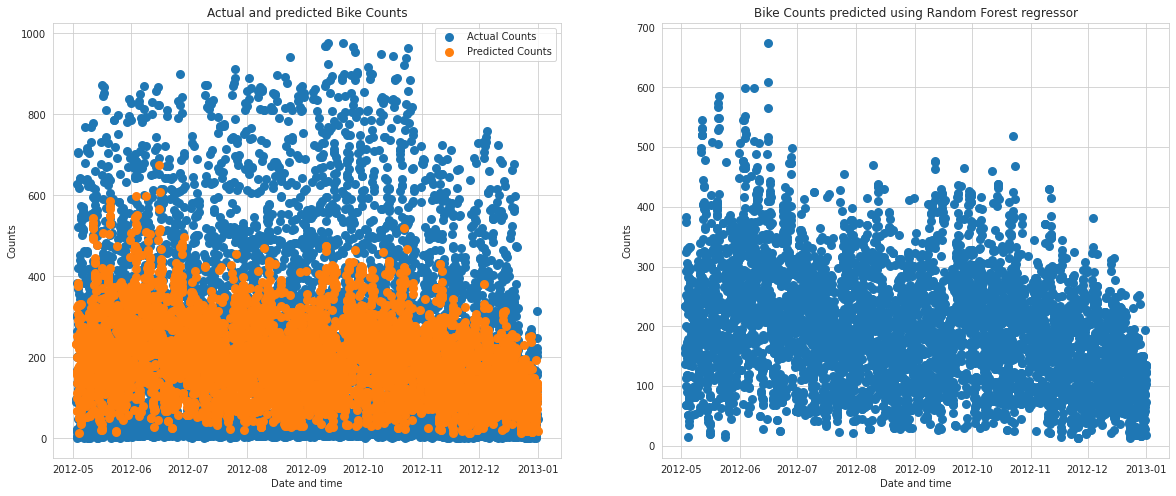

In [490]:
fig, (actual,predicted) = plt.subplots(ncols=2,nrows=1, figsize=(20,8))
actual.scatter(x=y_test.index,y=y_test[["count"]], linewidth=3)
actual.scatter(x=y_test.index, y=y_test.predicted_RF_regressor, linewidth=3)
actual.set_title("Actual and predicted Bike Counts")
actual.set_xlabel("Date and time")
actual.set_ylabel("Counts")
actual.legend(["Actual Counts","Predicted Counts"])


predicted.scatter(x=y_test.index, y=y_test.predicted_RF_regressor, linewidth=3)
predicted.set_title("Bike Counts predicted using Random Forest regressor")
predicted.set_xlabel("Date and time")
predicted.set_ylabel("Counts")
plt.show()


# 2nd Modelling

In [491]:
def Feature_Importance(model, X,y):

    # scale down the features using a pipeline function
    pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',model)
    ])

    # perform a gread seach with 5 cross validations and minimization matrix is negative mean square error
    search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=1
                      )
    
    # fit the pipline model and search for best parameters
    search.fit(X,y)

    # Now, we have to get the values of the coefficients of model
    coefficients = search.best_estimator_.named_steps['model'].coef_
    importance = np.abs(coefficients) # find the importance
    bestAlpha = search.best_params_['model__alpha']

    return importance, bestAlpha;


def RF_FeatureImportance(X, y):
    # grid seach for optimal parameters
    rf = RandomForestRegressor(random_state = 0)
    param_grid = { 
        'n_estimators': [10, 80, 100, 130],
        'max_depth' : [4,5,6]
    }

    CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5, verbose=0)
    CV_rfc.fit(X, y)

    # best parameters
    params = CV_rfc.best_params_

    # using the optimal features feature importance
    rf = RandomForestRegressor(n_estimators = params['n_estimators'], random_state = 0, max_depth=params['max_depth'])
    rf.fit(X, y)
    importances = rf.feature_importances_
    return importances, params

def Linear_regression(columns, name):
    linear = LinearRegression()
    linear.fit(X_train[columns],y_train,)

    labels = y_test.copy()
    labels['predicted'] = linear.predict(X_test[columns])


    print('Model Coefficients: ', columns)
    print('Model Coefficients: ', linear.coef_[0], '\n')
    print("count = ", end="")
    for i, j in zip(linear.coef_[0], columns):
        print(str(i)+"("+j+")  +  ", end=" ")
    print("error")



    MATRIX[name] = [round(metrics.mean_absolute_error(labels["count"], labels["predicted"]),2),
                                round(metrics.mean_squared_error(labels["count"], labels["predicted"]),2),
                                round(np.sqrt(metrics.mean_squared_error(labels["count"], labels["predicted"])),2),
                                round(metrics.r2_score(labels["count"], labels["predicted"]), 2)]

def Lasso_regression(columns, name):
    laso = Lasso(alpha=bestAlpha_lasso)
    laso.fit(X_train[columns], y_train) 

    labels = y_test.copy()

    labels = y_test.copy()
    labels['predicted'] = laso.predict(X_test[columns])
    labels

    print('Model Coefficients: ', columns)
    print('Model Coefficients: ', laso.coef_, '\n')
    print("count = ", end="")
    for i, j in zip(laso.coef_, columns):
        print(str(i)+"("+j+")  +  ", end=" ")
    print("error")

    MATRIX[name] = [round(metrics.mean_absolute_error(labels["count"], labels["predicted"]),2),
                                round(metrics.mean_squared_error(labels["count"], labels["predicted"]),2),
                                round(np.sqrt(metrics.mean_squared_error(labels["count"], labels["predicted"])),2),
                                round(metrics.r2_score(labels["count"], labels["predicted"]), 2)]

def Ridge_regression(columns, name):
    r = Ridge(alpha=bestAlpha_ridge)
    r.fit(X_train[columns], y_train) 

    labels = y_test.copy()

    labels = y_test.copy()
    labels['predicted'] = r.predict(X_test[columns])
    labels

    print('Model Coefficients: ', columns)
    print('Model Coefficients: ', r.coef_, '\n')
    print("count = ", end="")
    for i, j in zip(r.coef_, columns):
        print(str(i)+"("+j+")  +  ", end=" ")
    print("error")

    MATRIX[name] = [round(metrics.mean_absolute_error(labels["count"], labels["predicted"]),2),
                                round(metrics.mean_squared_error(labels["count"], labels["predicted"]),2),
                                round(np.sqrt(metrics.mean_squared_error(labels["count"], labels["predicted"])),2),
                                round(metrics.r2_score(labels["count"], labels["predicted"]), 2)]

def random_forest_regressor(columns, name):
    rf = RandomForestRegressor(n_estimators = params['n_estimators'], random_state = 0, max_depth=params['max_depth'])
    rf.fit(X_train[columns], y_train.values.ravel())

    labels = y_test.copy()

    labels = y_test.copy()
    labels['predicted'] = rf.predict(X_test[columns])
    labels

    MATRIX[name] = [round(metrics.mean_absolute_error(labels["count"], labels["predicted"]),2),
                                round(metrics.mean_squared_error(labels["count"], labels["predicted"]),2),
                                round(np.sqrt(metrics.mean_squared_error(labels["count"], labels["predicted"])),2),
                                round(metrics.r2_score(labels["count"], labels["predicted"]), 2)]


### **Feature Selection_2**

This feature selection is for the 2nd Modelling phase where we built models to improve the initial models by using LASSO and Ridge Regression

#### **1. Lasso feature selection**

Fitting 5 folds for each of 99 candidates, totalling 495 fits


,importance
a_temparature,51.821751
humidity,38.388960
windspeed,0.230274


Best alpha is: 5.6


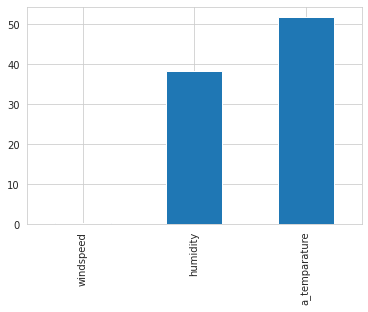

In [492]:
importance_lasso, bestAlpha_lasso = Feature_Importance(Lasso(), X_train,y_train)

data = {'importance':importance_lasso[importance_lasso > 0]}
lasso = pd.DataFrame(data, index=np.array(X_train.columns)[importance_lasso > 0])
display(lasso)
print("Best alpha is:", bestAlpha_lasso)
lasso['importance'].sort_values().plot.bar(rot=90)
plt.show()

#### **2. Ridge feature selections**

Fitting 5 folds for each of 99 candidates, totalling 495 fits


,importance
season,4.102174
holiday,3.363990
weekday,1.283294
workingday,0.305857
weather,1.565797
temperature,23.709174
a_temparature,79.552487
humidity,44.252132
windspeed,6.019738


Best alpha is: 0.1


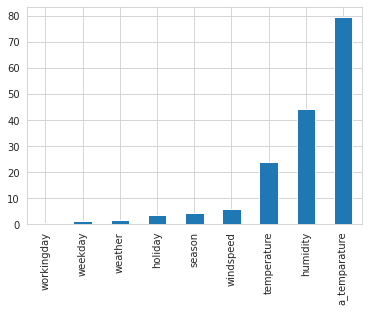

In [493]:
importance, bestAlpha_ridge = Feature_Importance(Ridge(), X_train,y_train)

data = {'importance':importance[importance > 0]}
importance = importance.ravel()
ridge = pd.DataFrame(data, index=np.array(X_train.columns)[importance > 0])
display(ridge)
print("Best alpha is:", bestAlpha_ridge)
ridge['importance'].sort_values().plot.bar(rot=90)
plt.show()

#### **3. Random forest feature selection**

,importance
season,0.005963
weekday,0.000333
workingday,0.015731
weather,0.003540
temperature,0.268038
a_temparature,0.253823
humidity,0.447617
windspeed,0.004955


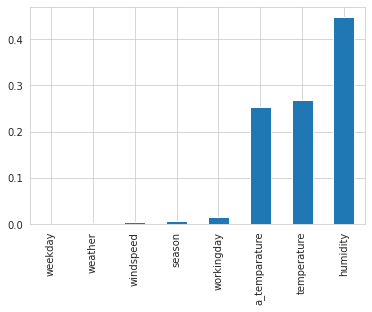

optimal number of trees used = 100
and maximum dept = 4


In [494]:
importances, params = RF_FeatureImportance(X_train, y_train.values.ravel())

data = {'importance' : importances}
forest = pd.DataFrame(data, index=np.array(X_train.columns))[importances > 0]
display(forest)
forest['importance'].sort_values().plot.bar(rot=90)
plt.show()
print("optimal number of trees used =", params['n_estimators'])
print("and maximum dept =", params['max_depth'])

In [495]:
MATRIX = pd.DataFrame(index=['Mean absolute error', 'Mean absolute error', 'Root-mean-square error', 'R2 score'])
MATRIX.T

,Mean absolute error,Mean absolute error,Root-mean-square error,R2 score


### **Linear Regression Models**

#### **1. Lasso Features**

In [496]:
columns = list(lasso.index)
name = "lasso features (LR)"
Linear_regression(columns, name)
MATRIX.T

Model Coefficients:  ['a_temparature', 'humidity', 'windspeed']
Model Coefficients:  [ 337.42959411 -211.7436761    39.00349159] 

count = 337.42959410620693(a_temparature)  +   -211.7436761012058(humidity)  +   39.003491593665586(windspeed)  +   error


,Mean absolute error,Mean absolute error,Root-mean-square error,R2 score
lasso features (LR),151.36,43752.5,209.17,0.09


#### **2. Ridge Features**

In [497]:
columns = list(ridge.index)
name = "ridge features (LR)"
Linear_regression(columns, name)
MATRIX.T

Model Coefficients:  ['season', 'holiday', 'weekday', 'workingday', 'weather', 'temperature', 'a_temparature', 'humidity', 'windspeed']
Model Coefficients:  [   3.7051332   -20.13136649    0.6403533     0.65732711    2.41072494
 -125.02136383  465.66382337 -220.01970362   47.83491912] 

count = 3.7051332017340064(season)  +   -20.1313664862316(holiday)  +   0.6403533033740905(weekday)  +   0.6573271106269871(workingday)  +   2.4107249444113528(weather)  +   -125.02136383165971(temperature)  +   465.6638233733498(a_temparature)  +   -220.01970361624734(humidity)  +   47.83491911785585(windspeed)  +   error


,Mean absolute error,Mean absolute error,Root-mean-square error,R2 score
lasso features (LR),151.36,43752.50,209.17,0.09
ridge features (LR),150.43,43357.86,208.23,0.10


#### **3. Random Forest Features**

In [498]:
columns = list(forest.index)
name = "random forest features (LR)"
Linear_regression(columns, name)
MATRIX.T

Model Coefficients:  ['season', 'weekday', 'workingday', 'weather', 'temperature', 'a_temparature', 'humidity', 'windspeed']
Model Coefficients:  [   3.6829248     0.80157258    2.43887313    2.34910182 -133.8973455
  475.88161401 -219.42108946   48.15122007] 

count = 3.6829247978957826(season)  +   0.8015725821300634(weekday)  +   2.438873125143667(workingday)  +   2.3491018233510834(weather)  +   -133.8973454972063(temperature)  +   475.8816140115747(a_temparature)  +   -219.42108945692203(humidity)  +   48.15122007289468(windspeed)  +   error


,Mean absolute error,Mean absolute error,Root-mean-square error,R2 score
lasso features (LR),151.36,43752.50,209.17,0.09
ridge features (LR),150.43,43357.86,208.23,0.10
random forest features (LR),150.51,43385.16,208.29,0.10


### **Lasso Regression Models**

#### **1. Lasso Features**

In [499]:
columns = list(lasso.index)
name = 'lasso features (lasso)'
Lasso_regression(columns, name)
MATRIX.T

Model Coefficients:  ['a_temparature', 'humidity', 'windspeed']
Model Coefficients:  [144.19621104 -80.61402209   0.        ] 

count = 144.19621103730012(a_temparature)  +   -80.61402209132304(humidity)  +   0.0(windspeed)  +   error


,Mean absolute error,Mean absolute error,Root-mean-square error,R2 score
lasso features (LR),151.36,43752.50,209.17,0.09
ridge features (LR),150.43,43357.86,208.23,0.10
random forest features (LR),150.51,43385.16,208.29,0.10
lasso features (lasso),167.07,51327.81,226.56,-0.07


#### **2. Ridge Features**

In [500]:
columns = list(ridge.index)
name = 'ridge features (lasso)'
Lasso_regression(columns, name)
MATRIX.T

Model Coefficients:  ['season', 'holiday', 'weekday', 'workingday', 'weather', 'temperature', 'a_temparature', 'humidity', 'windspeed']
Model Coefficients:  [  4.71921037  -0.           0.           0.          -7.8126505
 132.51143629   0.         -73.00296863   0.        ] 

count = 4.719210372238949(season)  +   -0.0(holiday)  +   0.0(weekday)  +   0.0(workingday)  +   -7.81265050435701(weather)  +   132.51143629145338(temperature)  +   0.0(a_temparature)  +   -73.00296862749448(humidity)  +   0.0(windspeed)  +   error


,Mean absolute error,Mean absolute error,Root-mean-square error,R2 score
lasso features (LR),151.36,43752.50,209.17,0.09
ridge features (LR),150.43,43357.86,208.23,0.10
random forest features (LR),150.51,43385.16,208.29,0.10
lasso features (lasso),167.07,51327.81,226.56,-0.07
ridge features (lasso),165.55,50212.00,224.08,-0.04


#### **3. Random Forest Features**

In [501]:
columns = list(forest.index)
name = 'random forest features (lasso)'
Lasso_regression(columns, name)
MATRIX.T

Model Coefficients:  ['season', 'weekday', 'workingday', 'weather', 'temperature', 'a_temparature', 'humidity', 'windspeed']
Model Coefficients:  [  4.71921037   0.           0.          -7.8126505  132.51143629
   0.         -73.00296863   0.        ] 

count = 4.719210372238949(season)  +   0.0(weekday)  +   0.0(workingday)  +   -7.81265050435701(weather)  +   132.51143629145338(temperature)  +   0.0(a_temparature)  +   -73.00296862749448(humidity)  +   0.0(windspeed)  +   error


,Mean absolute error,Mean absolute error,Root-mean-square error,R2 score
lasso features (LR),151.36,43752.50,209.17,0.09
ridge features (LR),150.43,43357.86,208.23,0.10
random forest features (LR),150.51,43385.16,208.29,0.10
lasso features (lasso),167.07,51327.81,226.56,-0.07
ridge features (lasso),165.55,50212.00,224.08,-0.04
random forest features (lasso),165.55,50212.00,224.08,-0.04


### **Ridge Regression Models**

#### **1. Lasso Features**

In [502]:
columns = list(lasso.index)
name = 'lasso features (ridge)'
Ridge_regression(columns, name)
MATRIX.T

Model Coefficients:  ['a_temparature', 'humidity', 'windspeed']
Model Coefficients:  [[ 337.32964287 -211.70003383   38.9953284 ]] 

count = [ 337.32964287 -211.70003383   38.9953284 ](a_temparature)  +   error


,Mean absolute error,Mean absolute error,Root-mean-square error,R2 score
lasso features (LR),151.36,43752.50,209.17,0.09
ridge features (LR),150.43,43357.86,208.23,0.10
random forest features (LR),150.51,43385.16,208.29,0.10
lasso features (lasso),167.07,51327.81,226.56,-0.07
ridge features (lasso),165.55,50212.00,224.08,-0.04
random forest features (lasso),165.55,50212.00,224.08,-0.04
lasso features (ridge),151.36,43754.97,209.18,0.09


#### **2. Ridge Features**

In [503]:
columns = list(ridge.index)
name = 'ridge features (ridge)'
Ridge_regression(columns, name)
MATRIX.T

Model Coefficients:  ['season', 'holiday', 'weekday', 'workingday', 'weather', 'temperature', 'a_temparature', 'humidity', 'windspeed']
Model Coefficients:  [[   3.69827841  -20.21693123    0.64077315    0.66629795    2.38985365
  -114.64945831  454.06823044 -219.9082691    47.14933997]] 

count = [   3.69827841  -20.21693123    0.64077315    0.66629795    2.38985365
 -114.64945831  454.06823044 -219.9082691    47.14933997](season)  +   error


,Mean absolute error,Mean absolute error,Root-mean-square error,R2 score
lasso features (LR),151.36,43752.50,209.17,0.09
ridge features (LR),150.43,43357.86,208.23,0.10
random forest features (LR),150.51,43385.16,208.29,0.10
lasso features (lasso),167.07,51327.81,226.56,-0.07
ridge features (lasso),165.55,50212.00,224.08,-0.04
random forest features (lasso),165.55,50212.00,224.08,-0.04
lasso features (ridge),151.36,43754.97,209.18,0.09
ridge features (ridge),150.42,43347.43,208.20,0.10


#### **3. Random Forest Features**

In [504]:
columns = list(forest.index)
name = 'random forest features (ridge)'
Ridge_regression(columns, name)
MATRIX.T

Model Coefficients:  ['season', 'weekday', 'workingday', 'weather', 'temperature', 'a_temparature', 'humidity', 'windspeed']
Model Coefficients:  [[   3.67573578    0.80270804    2.45582999    2.32761666 -123.23771066
   463.96710425 -219.30558405   47.44517452]] 

count = [   3.67573578    0.80270804    2.45582999    2.32761666 -123.23771066
  463.96710425 -219.30558405   47.44517452](season)  +   error


,Mean absolute error,Mean absolute error,Root-mean-square error,R2 score
lasso features (LR),151.36,43752.50,209.17,0.09
ridge features (LR),150.43,43357.86,208.23,0.10
random forest features (LR),150.51,43385.16,208.29,0.10
lasso features (lasso),167.07,51327.81,226.56,-0.07
ridge features (lasso),165.55,50212.00,224.08,-0.04
random forest features (lasso),165.55,50212.00,224.08,-0.04
lasso features (ridge),151.36,43754.97,209.18,0.09
ridge features (ridge),150.42,43347.43,208.20,0.10
random forest features (ridge),150.50,43374.13,208.26,0.10


### **Random Forest Regressor Models**

#### **1. Lasso Features**

In [505]:
columns = list(lasso.index)
name = 'lasso features (RF)'
random_forest_regressor(columns, name)

MATRIX.T

,Mean absolute error,Mean absolute error,Root-mean-square error,R2 score
lasso features (LR),151.36,43752.50,209.17,0.09
ridge features (LR),150.43,43357.86,208.23,0.10
random forest features (LR),150.51,43385.16,208.29,0.10
lasso features (lasso),167.07,51327.81,226.56,-0.07
ridge features (lasso),165.55,50212.00,224.08,-0.04
random forest features (lasso),165.55,50212.00,224.08,-0.04
lasso features (ridge),151.36,43754.97,209.18,0.09
ridge features (ridge),150.42,43347.43,208.20,0.10
random forest features (ridge),150.50,43374.13,208.26,0.10
lasso features (RF),149.45,43041.15,207.46,0.11


#### **2. Ridge Features**

In [506]:
columns = list(ridge.index)
name = 'ridge features (RF)'
random_forest_regressor(columns, name)
MATRIX.T

,Mean absolute error,Mean absolute error,Root-mean-square error,R2 score
lasso features (LR),151.36,43752.50,209.17,0.09
ridge features (LR),150.43,43357.86,208.23,0.10
random forest features (LR),150.51,43385.16,208.29,0.10
lasso features (lasso),167.07,51327.81,226.56,-0.07
ridge features (lasso),165.55,50212.00,224.08,-0.04
random forest features (lasso),165.55,50212.00,224.08,-0.04
lasso features (ridge),151.36,43754.97,209.18,0.09
ridge features (ridge),150.42,43347.43,208.20,0.10
random forest features (ridge),150.50,43374.13,208.26,0.10
lasso features (RF),149.45,43041.15,207.46,0.11


#### **3. Random Forest Features**

In [507]:
columns = list(forest.index)
name = 'random forest features (RF)'
random_forest_regressor(columns, name)
MATRIX.T

,Mean absolute error,Mean absolute error,Root-mean-square error,R2 score
lasso features (LR),151.36,43752.50,209.17,0.09
ridge features (LR),150.43,43357.86,208.23,0.10
random forest features (LR),150.51,43385.16,208.29,0.10
lasso features (lasso),167.07,51327.81,226.56,-0.07
ridge features (lasso),165.55,50212.00,224.08,-0.04
random forest features (lasso),165.55,50212.00,224.08,-0.04
lasso features (ridge),151.36,43754.97,209.18,0.09
ridge features (ridge),150.42,43347.43,208.20,0.10
random forest features (ridge),150.50,43374.13,208.26,0.10
lasso features (RF),149.45,43041.15,207.46,0.11
